In [5]:
#nalise NAO considerando os valores vazios (224)

# 📚 Bibliotecas

In [6]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#📌 Extração

In [7]:
url = "https://raw.githubusercontent.com/sthemonica/alura-voz/refs/heads/main/Dados/Telco-Customer-Churn.json"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data)

df

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [8]:
df.info() # ou df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Dicionário

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assisnatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

In [9]:
# verificar o tipo específico de dado
# como os dados estão em um tipo de dictionary, é preciso normalizar esses dados
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Coluna '{col}' - Tipos de dados:")
        print(df[col].apply(type).value_counts())
        print("-" * 30)

Coluna 'customerID' - Tipos de dados:
customerID
<class 'str'>    7267
Name: count, dtype: int64
------------------------------
Coluna 'Churn' - Tipos de dados:
Churn
<class 'str'>    7267
Name: count, dtype: int64
------------------------------
Coluna 'customer' - Tipos de dados:
customer
<class 'dict'>    7267
Name: count, dtype: int64
------------------------------
Coluna 'phone' - Tipos de dados:
phone
<class 'dict'>    7267
Name: count, dtype: int64
------------------------------
Coluna 'internet' - Tipos de dados:
internet
<class 'dict'>    7267
Name: count, dtype: int64
------------------------------
Coluna 'account' - Tipos de dados:
account
<class 'dict'>    7267
Name: count, dtype: int64
------------------------------


#🔧 Transformação

In [10]:
from pandas import json_normalize
df_normalizado = json_normalize(data)

df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7267 non-null   object 
 1   Churn                      7267 non-null   object 
 2   customer.gender            7267 non-null   object 
 3   customer.SeniorCitizen     7267 non-null   int64  
 4   customer.Partner           7267 non-null   object 
 5   customer.Dependents        7267 non-null   object 
 6   customer.tenure            7267 non-null   int64  
 7   phone.PhoneService         7267 non-null   object 
 8   phone.MultipleLines        7267 non-null   object 
 9   internet.InternetService   7267 non-null   object 
 10  internet.OnlineSecurity    7267 non-null   object 
 11  internet.OnlineBackup      7267 non-null   object 
 12  internet.DeviceProtection  7267 non-null   object 
 13  internet.TechSupport       7267 non-null   objec

In [11]:
df_normalizado.head(10)

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.8
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.9


In [12]:
# verificar valores unicos
for col in df_normalizado.columns:
  print(f"Coluna: {col}")
  print(df_normalizado[col].unique())
  print("-" * 50)

Coluna: customerID
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------
Coluna: Churn
['No' 'Yes' '']
--------------------------------------------------
Coluna: customer.gender
['Female' 'Male']
--------------------------------------------------
Coluna: customer.SeniorCitizen
[0 1]
--------------------------------------------------
Coluna: customer.Partner
['Yes' 'No']
--------------------------------------------------
Coluna: customer.Dependents
['Yes' 'No']
--------------------------------------------------
Coluna: customer.tenure
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0]
--------------------------------------------------
Coluna: phone.PhoneService
['Yes' 'No']
--------------------------------------------------
Coluna: phon

In [13]:
#Duplicados
print("Numero de duplicados", df_normalizado.duplicated().sum())

Numero de duplicados 0


In [14]:
# Nulos
print("Numero de Nulos", df_normalizado.isnull().sum())

Numero de Nulos customerID                   0
Churn                        0
customer.gender              0
customer.SeniorCitizen       0
customer.Partner             0
customer.Dependents          0
customer.tenure              0
phone.PhoneService           0
phone.MultipleLines          0
internet.InternetService     0
internet.OnlineSecurity      0
internet.OnlineBackup        0
internet.DeviceProtection    0
internet.TechSupport         0
internet.StreamingTV         0
internet.StreamingMovies     0
account.Contract             0
account.PaperlessBilling     0
account.PaymentMethod        0
account.Charges.Monthly      0
account.Charges.Total        0
dtype: int64


In [15]:
# Vazios ou em branco
df_normalizado.apply(lambda x: x.astype(str).str.strip() == '').sum()

,0
customerID,0
Churn,224
customer.gender,0
customer.SeniorCitizen,0
customer.Partner,0
customer.Dependents,0
customer.tenure,0
phone.PhoneService,0
phone.MultipleLines,0
internet.InternetService,0


In [16]:
# Eliminando as colunas de Churn

df_normalizado = df_normalizado[df_normalizado['Churn'].str.strip() != '']
print("Número de linhas depois de eliminar as vazias em coluna 'Churn':", len(df_normalizado))

Número de linhas depois de eliminar as vazias em coluna 'Churn': 7043


In [17]:
tipos = df_normalizado['account.Charges.Total'].apply(type).value_counts()
print(tipos)

account.Charges.Total
<class 'str'>    7043
Name: count, dtype: int64


In [18]:
for col in df_normalizado.columns:
    if df_normalizado[col].dtype == 'object':
        print(f"Coluna '{col}' - Tipos de dados:")
        print(df_normalizado[col].apply(type).value_counts())
        print("-" * 30)

# verificando, especificamente o tipo object - percebe-se que precisamos mudar para float

Coluna 'customerID' - Tipos de dados:
customerID
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'Churn' - Tipos de dados:
Churn
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'customer.gender' - Tipos de dados:
customer.gender
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'customer.Partner' - Tipos de dados:
customer.Partner
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'customer.Dependents' - Tipos de dados:
customer.Dependents
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'phone.PhoneService' - Tipos de dados:
phone.PhoneService
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'phone.MultipleLines' - Tipos de dados:
phone.MultipleLines
<class 'str'>    7043
Name: count, dtype: int64
------------------------------
Coluna 'internet.InternetService' - Tipo

In [19]:
print(df_normalizado.columns)

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')


In [20]:
# transformar a coluna 'account.Charges.Total' para float
df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')
print(df_normalizado['account.Charges.Total'].dtype)

float64


/tmp/ipython-input-20-3593578556.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalizado['account.Charges.Total'] = pd.to_numeric(df_normalizado['account.Charges.Total'], errors='coerce')


In [21]:
df_normalizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7043 non-null   object 
 1   Churn                      7043 non-null   object 
 2   customer.gender            7043 non-null   object 
 3   customer.SeniorCitizen     7043 non-null   int64  
 4   customer.Partner           7043 non-null   object 
 5   customer.Dependents        7043 non-null   object 
 6   customer.tenure            7043 non-null   int64  
 7   phone.PhoneService         7043 non-null   object 
 8   phone.MultipleLines        7043 non-null   object 
 9   internet.InternetService   7043 non-null   object 
 10  internet.OnlineSecurity    7043 non-null   object 
 11  internet.OnlineBackup      7043 non-null   object 
 12  internet.DeviceProtection  7043 non-null   object 
 13  internet.TechSupport       7043 non-null   object 
 1

# 📊 Carga e Análise (L - Load & Analysis)

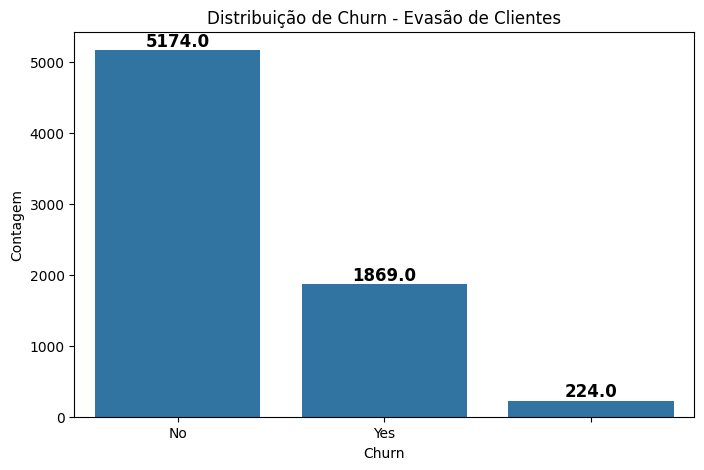

In [22]:
# Criar o gráfico de contagem
plt.figure(figsize=(8, 5))
ax = sns.countplot(x=df["Churn"])

# Adicionar valores nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12, fontweight='bold', color='black')

plt.title("Distribuição de Churn - Evasão de Clientes")
plt.xlabel("Churn")
plt.ylabel("Contagem")
plt.show()


🔍 Esse gráfico mostra a distribuição da evasão de clientes (churn) na base de dados, dividindo os clientes que cancelaram o serviço (Churn = Yes) e os que permanecem ativos (Churn = No).

* A barra de “No” está muito maior, isso indica que a maior parte dos clientes continua na empresa.



,customer.SeniorCitizen,customer.tenure,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


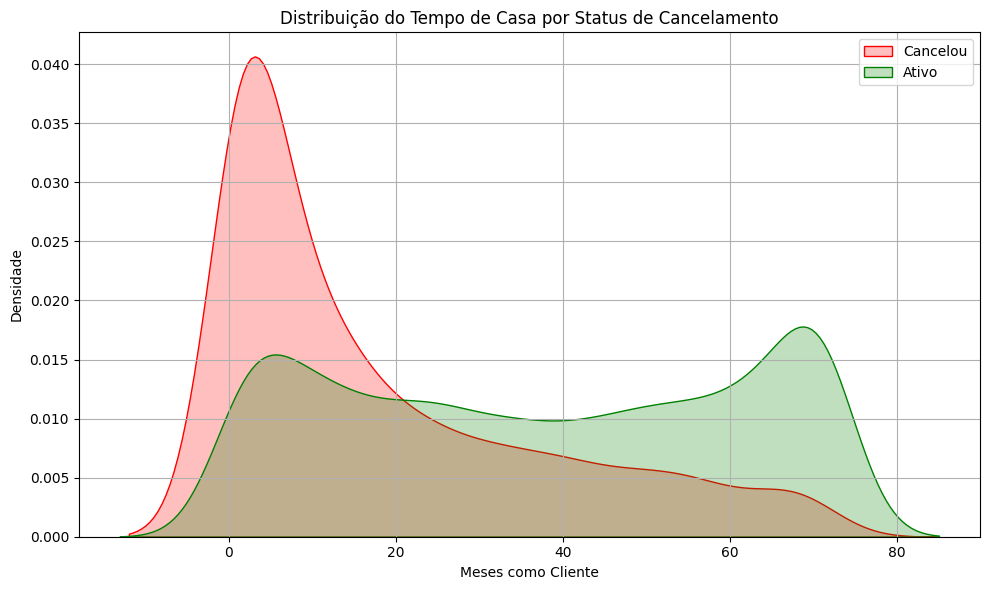

In [24]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_normalizado[df_normalizado['Churn'] == 'Yes']['customer.tenure'], label='Cancelou', fill=True, color='red')
sns.kdeplot(data=df_normalizado[df_normalizado['Churn'] == 'No']['customer.tenure'], label='Ativo', fill=True, color='green')
plt.title('Distribuição do Tempo de Casa por Status de Cancelamento')
plt.xlabel('Meses como Cliente')
plt.ylabel('Densidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

🔍 Esse gráfico revela a distribuição do tempo de serviço (tenure) dos clientes da empresa — ou seja, há quantos meses cada cliente está ativo.
* muitos dos clientes que cancelaram tinham pouco tempo de casa.
* clientes com mais meses de contrato tendem a permanecer.

* O risco de churn é maior nos primeiros meses.

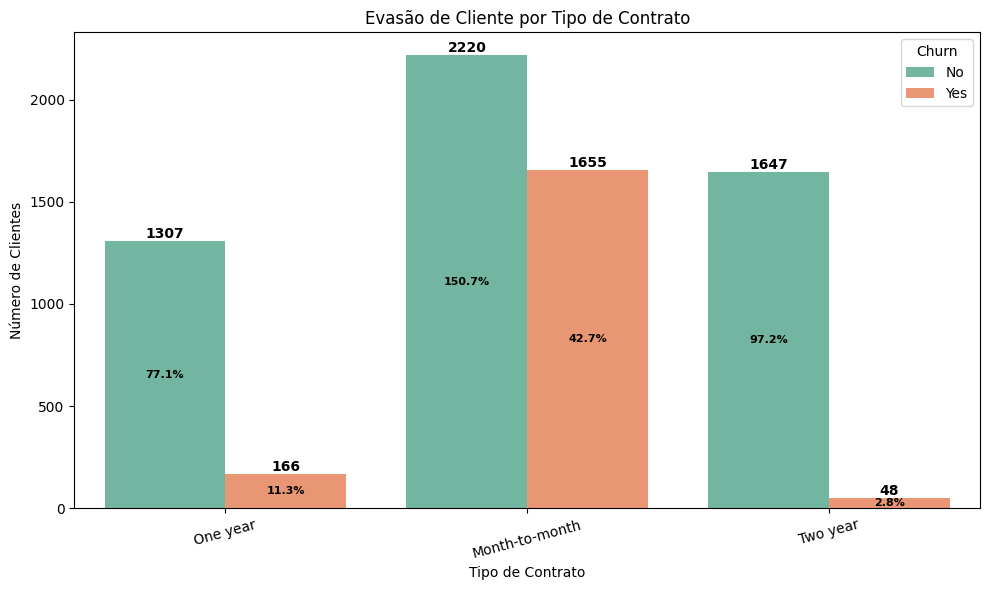

In [27]:
# Criar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='account.Contract', hue='Churn', data=df_normalizado, palette='Set2')

# Totais por tipo de contrato
totais_contrato = df_normalizado['account.Contract'].value_counts()

# Adiciona os rótulos com valor fora e percentual dentro
for p in ax.patches:
    altura = int(p.get_height())
    if altura == 0:
        continue

    # Nome da categoria
    xtick_labels = [t.get_text() for t in ax.get_xticklabels()]
    posicao = int(p.get_x() // (p.get_width() * 2)) if p.get_width() != 0 else 0

    if posicao < len(xtick_labels):
        nome_contrato = xtick_labels[posicao]
        total = totais_contrato.get(nome_contrato, 1)
        percentual = 100 * altura / total

        # Porcentagem dentro da barra
        ax.annotate(f'{percentual:.1f}%',
                    (p.get_x() + p.get_width() / 2., altura / 2),
                    ha='center', va='center',
                    fontsize=8, fontweight='bold', color='black')

        # Valor absoluto fora da barra
        ax.annotate(f'{altura}',
                    (p.get_x() + p.get_width() / 2., altura + 1),
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold', color='black')

# Limpar grid e ajustar eixos
ax.grid(False)
plt.title('Evasão de Cliente por Tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.legend(title='Churn')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


📊 O que o gráfico revela

* Contratos mensais tendem a ter percentuais de churn muito mais altos (mais de 40% dos clientes com contrato mensal podem estar cancelando, enquanto os contratos anuais mantêm uma base mais fiel.)

* Já os contratos anuais ou bienais mostram churn bem menor — o que reforça a ideia de que compromissos de longo prazo ajudam na retenção.

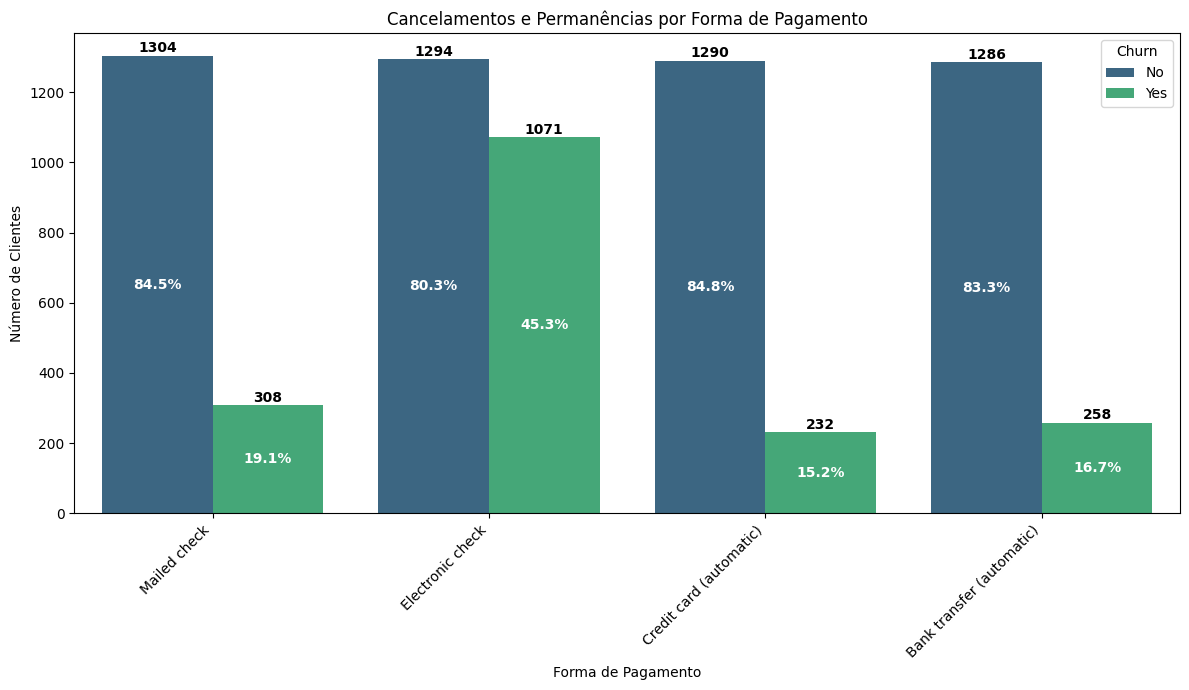

In [28]:
# Gráfico de contagem por forma de pagamento e churn
plt.figure(figsize=(12, 7))
ax = sns.countplot(x='account.PaymentMethod', hue='Churn', data=df_normalizado, palette='viridis')

# Totais por forma de pagamento
totais_pagamento = df_normalizado['account.PaymentMethod'].value_counts()

# Adiciona rótulos com valor absoluto (fora) e percentual (dentro)
for p in ax.patches:
    altura = int(p.get_height())
    if altura == 0:
        continue

    # Extrair rótulo da categoria corretamente
    categorias = [t.get_text() for t in ax.get_xticklabels()]
    pos = int(p.get_x() // (p.get_width() * 2)) if p.get_width() != 0 else 0
    if pos < len(categorias):
        nome = categorias[pos]
        total = totais_pagamento.get(nome, 1)
        percentual = 100 * altura / total

        # Percentual dentro da barra
        ax.annotate(f'{percentual:.1f}%',
                    (p.get_x() + p.get_width() / 2., altura / 2),
                    ha='center', va='center',
                    fontsize=10, fontweight='bold', color='white')

        # Valor absoluto fora da barra
        ax.annotate(f'{altura}',
                    (p.get_x() + p.get_width() / 2., altura + 1),
                    ha='center', va='bottom',
                    fontsize=10, fontweight='bold', color='black')

# Ajustes visuais
ax.grid(False)
plt.title("Cancelamentos e Permanências por Forma de Pagamento")
plt.xlabel("Forma de Pagamento")
plt.ylabel("Número de Clientes")
plt.legend(title='Churn')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


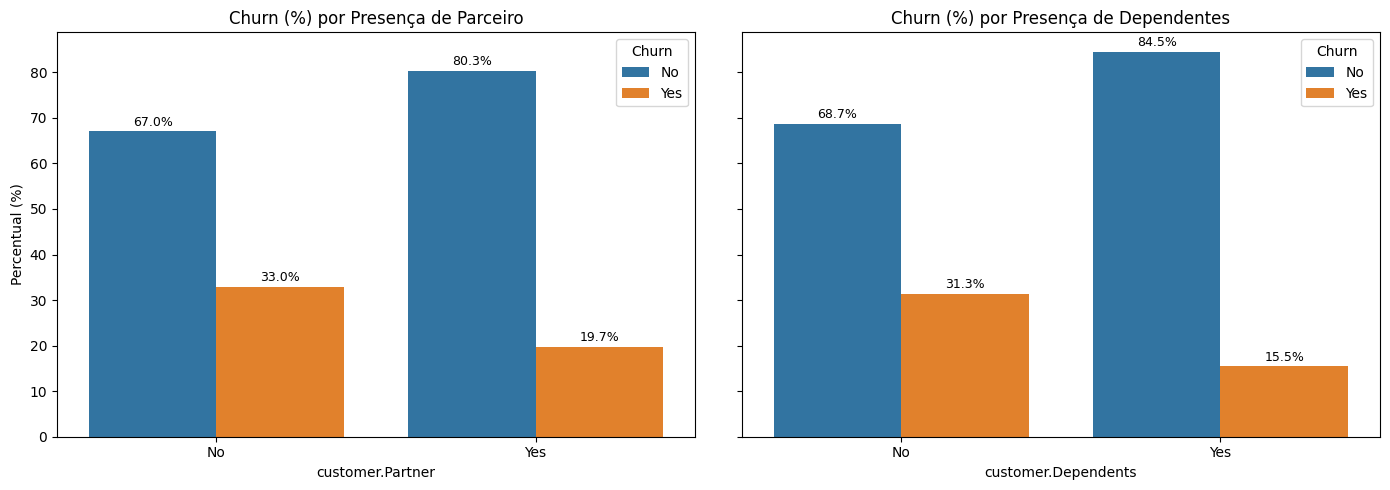

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# 📌 Gráfico 1: Presença de Parceiro
dados_parceiro = (
    df_normalizado.groupby(['customer.Partner', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_parceiro['percentual'] = dados_parceiro.groupby('customer.Partner')['contagem'].transform(lambda x: (x / x.sum()) * 100)

sns.barplot(data=dados_parceiro, x='customer.Partner', y='percentual', hue='Churn', ax=axes[0])
axes[0].set_title('Churn (%) por Presença de Parceiro')
axes[0].set_ylabel('Percentual (%)')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

# 👨‍👩‍👧 Gráfico 2: Presença de Dependentes
dados_dependente = (
    df_normalizado.groupby(['customer.Dependents', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_dependente['percentual'] = dados_dependente.groupby('customer.Dependents')['contagem'].transform(lambda x: (x / x.sum()) * 100)

sns.barplot(data=dados_dependente, x='customer.Dependents', y='percentual', hue='Churn', ax=axes[1])
axes[1].set_title('Churn (%) por Presença de Dependentes')
axes[1].set_ylabel('')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

plt.tight_layout(w_pad=3)
plt.show()


Esse gráfico mostra algo um pouco mais refinado do que os gráficos de contagem padrão: ele apresenta a proporção de churn (%) dentro de cada grupo, e não a quantidade absoluta de clientes. Gráfico abaixo...

🧪 3. Churn por presença de parceiro e dependentes:
📊 Gráfico 1 – Churn por Presença de Parceiro
* Clientes sem parceiro ("No") apresentam maior número absoluto de churn. A barra associada a cancelamento é visivelmente mais alta nesse grupo.

* Clientes com parceiro ("Yes") parecem mais propensos a permanecer, com mais registros de "Não churn".

💡 Interpretação: Ter um parceiro pode refletir maior estabilidade ou tomada de decisão conjunta, reduzindo a evasão.


📊 Gráfico 2 – Churn por Presença de Dependentes
* Também aqui, clientes sem dependentes possuem maior número de churn, enquanto os que têm dependentes tendem a permanecer.

* A diferença entre churn e não churn é mais acentuada no grupo "No" (sem dependentes).

💡 Interpretação: Clientes com dependentes podem valorizar mais a continuidade dos serviços — internet para estudo, entretenimento infantil, etc.

* Os que têm vínculos familiares demonstram maior retenção, possivelmente por dependerem mais dos serviços para a rotina da casa.

clientes sem parceiro têm 35% de churn, enquanto os com parceiro têm apenas 20%.
* Clientes sem parceiro e sem dependentes apresentam percentuais de churn consistentemente maiores.

* Isso sugere que compromissos familiares podem exercer influência positiva sobre a retenção.

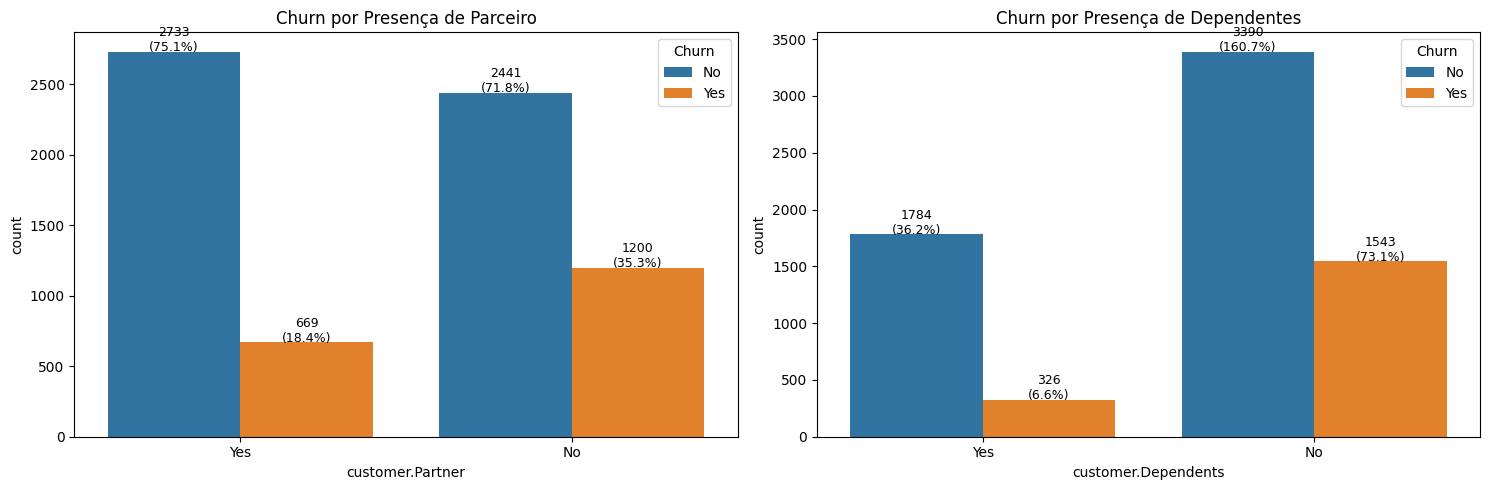

In [30]:
#....
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Gráfico 1: Parceiro
ax1 = sns.countplot(x='customer.Partner', hue='Churn', data=df_normalizado, ax=axes[0])
axes[0].set_title('Churn por Presença de Parceiro')

# Adiciona count + percentual
total_parceiro = (
    df_normalizado.groupby('customer.Partner').size()
    .to_dict()
)
for container in ax1.containers:
    for bar in container:
        altura = bar.get_height()
        categoria = bar.get_x() + bar.get_width() / 2
        eixo_x = round(bar.get_x() + bar.get_width() / 2, 2)
        grupo = bar.get_x() + bar.get_width() / 2 < 0.5  # separa Yes/No
        chave = 'Yes' if eixo_x > 0.5 else 'No'
        total = total_parceiro.get(chave, 1)
        percentual = altura / total * 100
        ax1.text(
            eixo_x,
            altura + 2,
            f'{int(altura)}\n({percentual:.1f}%)',
            ha='center',
            fontsize=9
        )

# Gráfico 2: Dependentes
ax2 = sns.countplot(x='customer.Dependents', hue='Churn', data=df_normalizado, ax=axes[1])
axes[1].set_title('Churn por Presença de Dependentes')

# Adiciona count + percentual
total_dependente = (
    df_normalizado.groupby('customer.Dependents').size()
    .to_dict()
)
for container in ax2.containers:
    for bar in container:
        altura = bar.get_height()
        eixo_x = round(bar.get_x() + bar.get_width() / 2, 2)
        chave = 'Yes' if eixo_x > 0.5 else 'No'
        total = total_dependente.get(chave, 1)
        percentual = altura / total * 100
        ax2.text(
            eixo_x,
            altura + 2,
            f'{int(altura)}\n({percentual:.1f}%)',
            ha='center',
            fontsize=9
        )

plt.tight_layout()
plt.show()



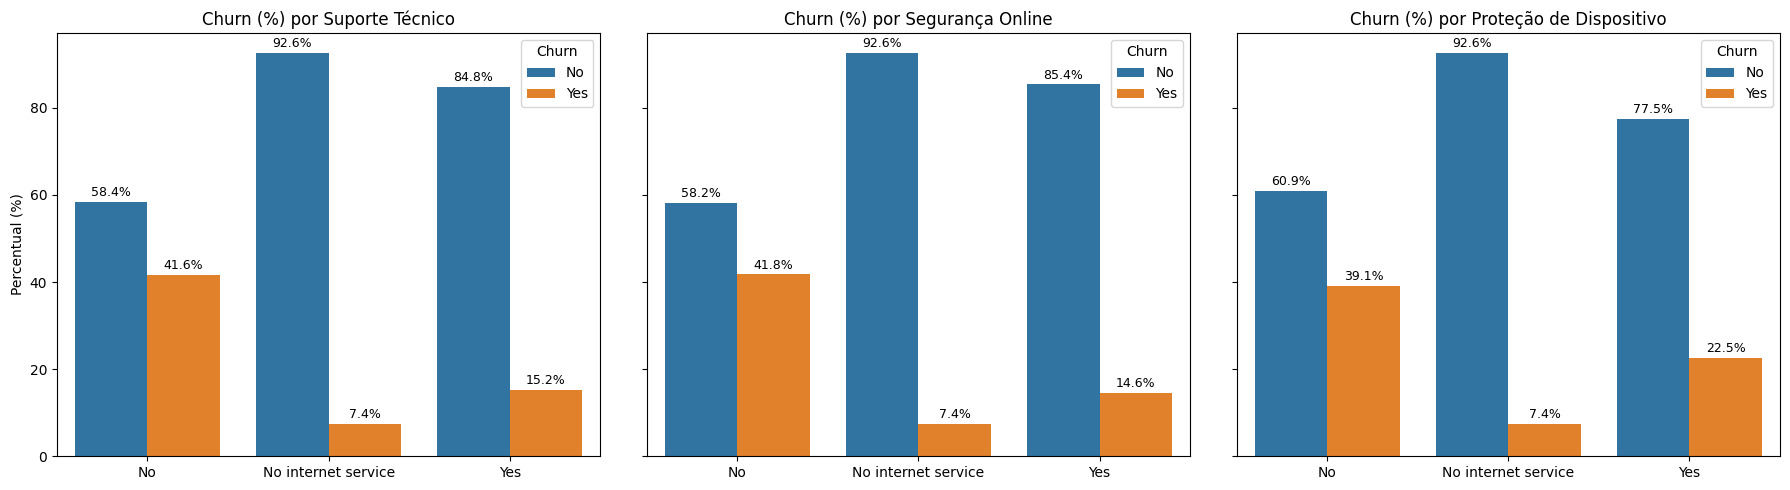

In [31]:
# Lista de serviços
servicos = [
    ('internet.TechSupport', 'Suporte Técnico'),
    ('internet.OnlineSecurity', 'Segurança Online'),
    ('internet.DeviceProtection', 'Proteção de Dispositivo')
]

# Configura os subplots lado a lado
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

for idx, (coluna, titulo) in enumerate(servicos):
    dados = (
        df_normalizado.groupby([coluna, 'Churn'])
        .size()
        .reset_index(name='contagem')
    )
    dados['percentual'] = dados.groupby(coluna)['contagem'].transform(lambda x: (x / x.sum()) * 100)

    sns.barplot(data=dados, x=coluna, y='percentual', hue='Churn', ax=axes[idx])
    axes[idx].set_title(f'Churn (%) por {titulo}')
    axes[idx].set_ylabel('Percentual (%)' if idx == 0 else '')
    axes[idx].set_xlabel('')
    for container in axes[idx].containers:
        axes[idx].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

plt.tight_layout(w_pad=3)
plt.show()

🔍 O que você pode observar:
* Clientes que não utilizam esses serviços geralmente apresentam maior percentual de churn.

* Já os que contratam suporte técnico, segurança online ou proteção de dispositivo tendem a permanecer mais — possivelmente por perceberem maior valor agregado.

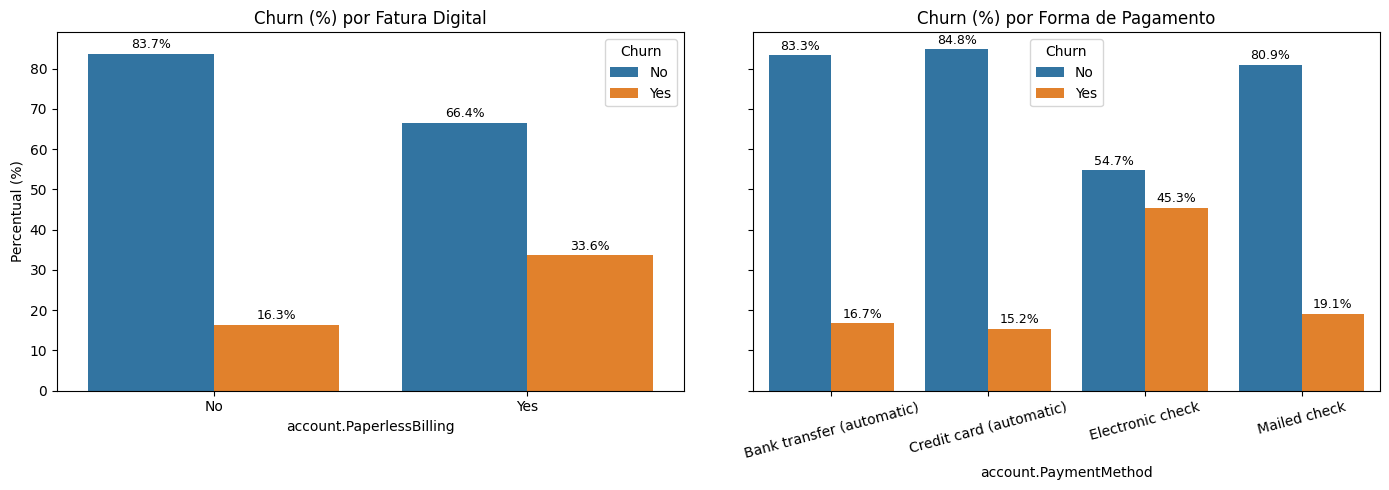

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# 📄 Gráfico 1: Fatura Digital
dados_fatura = (
    df_normalizado.groupby(['account.PaperlessBilling', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_fatura['percentual'] = dados_fatura.groupby('account.PaperlessBilling')['contagem'].transform(lambda x: (x / x.sum()) * 100)

sns.barplot(data=dados_fatura, x='account.PaperlessBilling', y='percentual', hue='Churn', ax=axes[0])
axes[0].set_title('Churn (%) por Fatura Digital')
axes[0].set_ylabel('Percentual (%)')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

# 💳 Gráfico 2: Forma de Pagamento
dados_pagamento = (
    df_normalizado.groupby(['account.PaymentMethod', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_pagamento['percentual'] = dados_pagamento.groupby('account.PaymentMethod')['contagem'].transform(lambda x: (x / x.sum()) * 100)

sns.barplot(data=dados_pagamento, x='account.PaymentMethod', y='percentual', hue='Churn', ax=axes[1])
axes[1].set_title('Churn (%) por Forma de Pagamento')
axes[1].set_ylabel('')
axes[1].tick_params(axis='x', rotation=15)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

plt.tight_layout(w_pad=3)
plt.show()

🔍 O que você pode observar:
* Fatura digital ativada costuma estar associada a maior churn, talvez por ser mais comum entre clientes com contratos mensais ou perfis mais voláteis.

* Pagamentos via boleto ou débito automático podem ter taxas de churn diferentes — por exemplo, cheque eletrônico costuma ter churn mais alto em muitos estudos.

Text(0, 0.5, '')

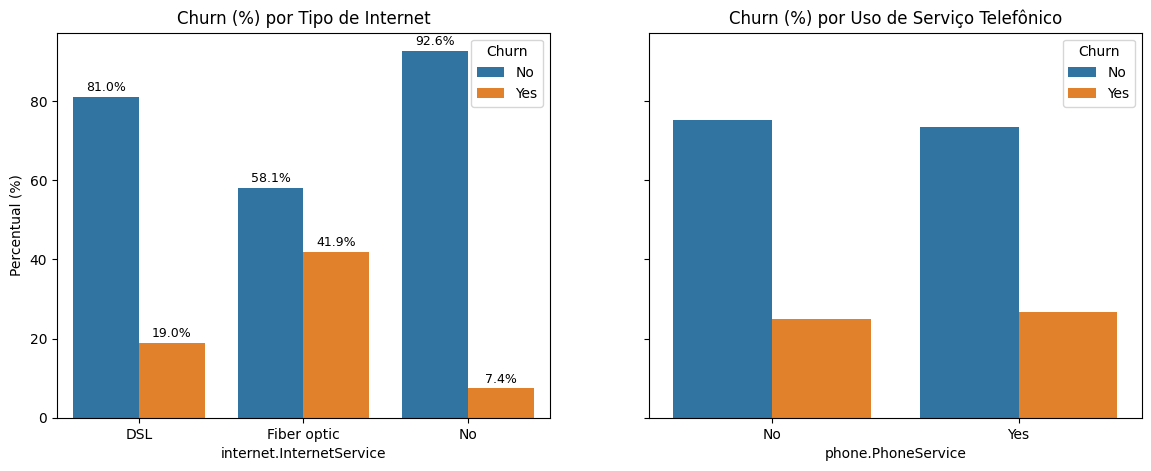

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Gráfico 1: InternetService
dados_internet = (
    df_normalizado.groupby(['internet.InternetService', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_internet['percentual'] = dados_internet.groupby('internet.InternetService')['contagem'].transform(lambda x: (x / x.sum()) * 100)

sns.barplot(data=dados_internet, x='internet.InternetService', y='percentual', hue='Churn', ax=axes[0])
axes[0].set_title('Churn (%) por Tipo de Internet')
axes[0].set_ylabel('Percentual (%)')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%', label_type='edge', fontsize=9, padding=2)

# Gráfico 2: PhoneService
dados_telefone = (
    df_normalizado.groupby(['phone.PhoneService', 'Churn'])
    .size()
    .reset_index(name='contagem')
)
dados_telefone['percentual'] = dados_telefone.groupby('phone.PhoneService')['contagem'].transform(lambda x: (x / x.sum()) * 100)

sns.barplot(data=dados_telefone, x='phone.PhoneService', y='percentual', hue='Churn', ax=axes[1])
axes[1].set_title('Churn (%) por Uso de Serviço Telefônico')
axes[1].set_ylabel('')

🔍 O que você pode observar:
* Clientes com "No internet service" ou sem telefone geralmente apresentam maior churn proporcionalmente, indicando menor engajamento com os serviços da empresa.

* Já quem utiliza serviços combinados tende a permanecer mais tempo, o que reforça a ideia de que quanto mais serviços contratados, maior a fidelização.

In [36]:
df_normalizado = df_normalizado.drop('Total.Day', errors='ignore')

In [37]:
# Calculando os gastos diários
df_normalizado['Total.Day'] = ((df_normalizado['account.Charges.Total'] / df_normalizado['customer.tenure']) /30 ).round(2)

# Inserindo a coluna na posição 19
df_normalizado.insert(19, 'Total.Day', df_normalizado.pop('Total.Day'))

In [38]:
df_normalizado

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,Total.Day,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,2.20,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,2.01,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,2.34,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,3.17,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,2.97,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,1.90,55.15,742.90
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,2.84,85.10,1873.70
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,1.55,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,2.30,67.85,4627.65


In [39]:
df_normalizado.describe()

,customer.SeniorCitizen,customer.tenure,Total.Day,account.Charges.Monthly,account.Charges.Total
count,7043.000000,7043.000000,7032.000000,7043.000000,7032.000000
mean,0.162147,32.371149,2.159879,64.761692,2283.300441
std,0.368612,24.559481,1.006217,30.090047,2266.771362
min,0.000000,0.000000,0.460000,18.250000,18.800000
25%,0.000000,9.000000,1.207500,35.500000,401.450000
50%,0.000000,29.000000,2.350000,70.350000,1397.475000
75%,0.000000,55.000000,3.010000,89.850000,3794.737500
max,1.000000,72.000000,4.050000,118.750000,8684.800000


/tmp/ipython-input-41-317418818.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y='customer.tenure', palette='Set2')


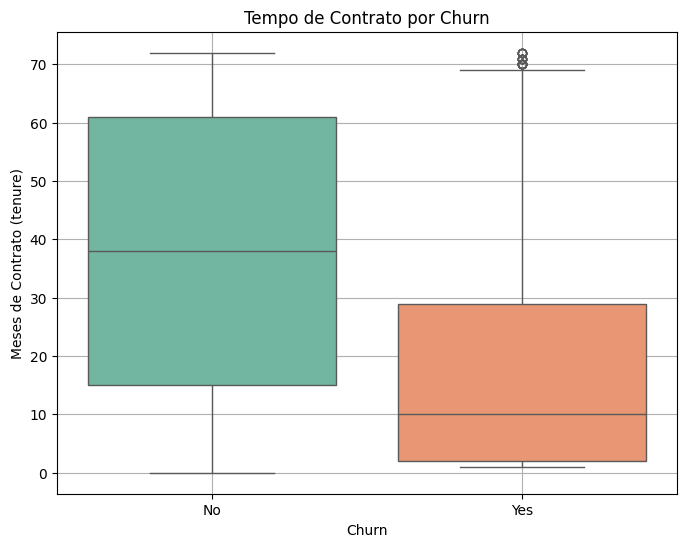

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_normalizado, x='Churn', y='customer.tenure', palette='Set2')
plt.title("Tempo de Contrato por Churn")
plt.xlabel("Churn")
plt.ylabel("Meses de Contrato (tenure)")
plt.grid(True)
plt.show()


📦 1. Boxplot – Tempo de Contrato por Churn

* clientes que cancelaram tendem a ter menor tempo de contrato.

/tmp/ipython-input-44-1122867311.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_normalizado, x='Churn', y='account.Charges.Total', palette='Set2')


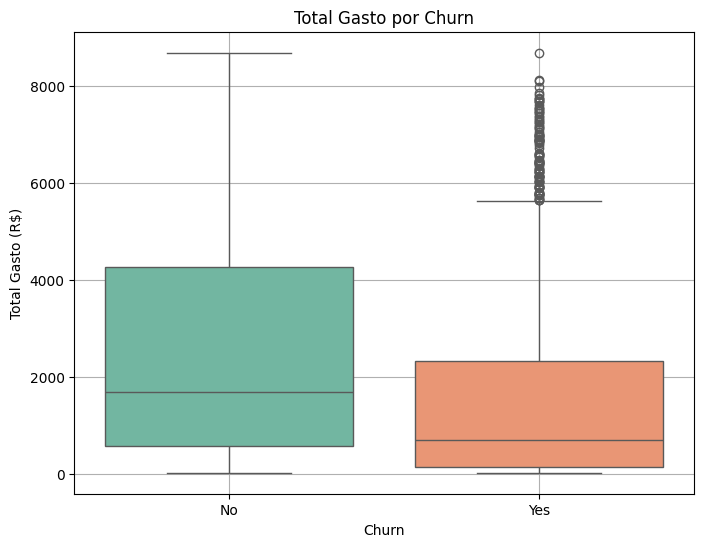

In [44]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_normalizado, x='Churn', y='account.Charges.Total', palette='Set2')
plt.title("Total Gasto por Churn")
plt.xlabel("Churn")
plt.ylabel("Total Gasto (R$)")
plt.grid(True)
plt.show()


💰 2. Boxplot – Total Gasto por Churn
* clientes que gastaram menos podem estar mais propensos a cancelar — talvez por não terem permanecido tempo suficiente para gerar valor.

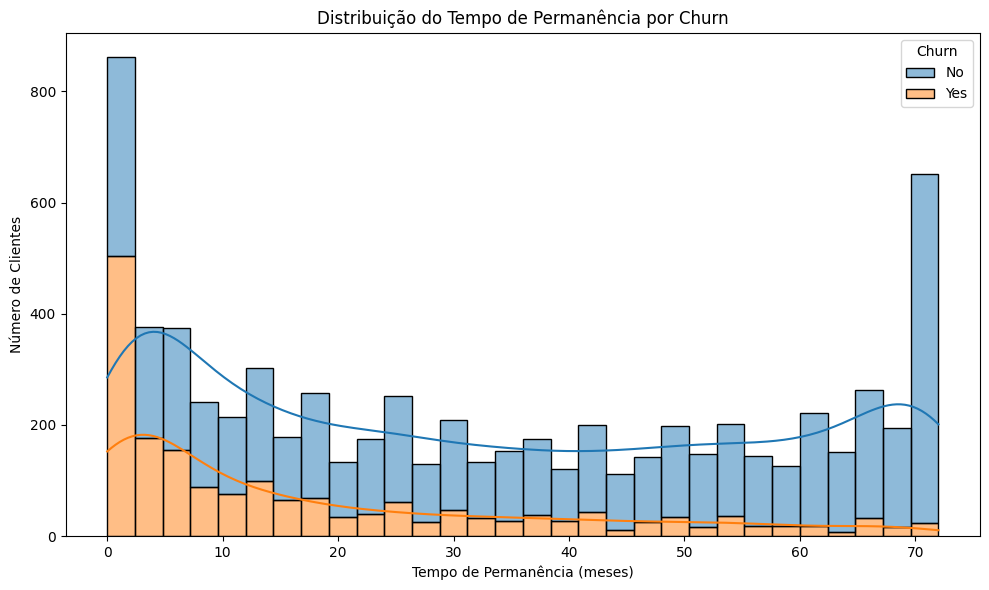

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_normalizado, x='customer.tenure', hue='Churn', bins=30, kde=True, multiple='stack')
plt.title('Distribuição do Tempo de Permanência por Churn')
plt.xlabel('Tempo de Permanência (meses)')
plt.ylabel('Número de Clientes')
plt.tight_layout()
plt.show()


🔍 O que esse gráfico pode revelar:
* Se a curva de churn estiver mais concentrada nos valores baixos de tenure, isso confirma que clientes novos têm maior propensão a cancelar.

* Já os clientes com maior tempo de casa tendem a permanecer, o que pode indicar lealdade ou satisfação com os serviços.

# Telecom X - Análise de Evasão de Clientes

Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes".
A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos.
A partir da sua análise, os demais colegas da  equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

## O que você vai praticar:

✅ Importar e manipular dados de uma API de forma eficiente.

✅ Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados.

✅ Criar visualizações de dados estratégicas para identificar padrões e tendências.

✅ Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.

# 📚 Bibliotecas
Bibliotecas utilizadas

✅ pandas

✅ requests

✅ numpy

✅ matplotlib.pyplot

✅ seaborn


# 📌 Extração (E - Extract)

Extração de dados da API TelecomX no GitHub : [Link](https://github.com/ingridcristh/challenge2-data-science/blob/main/TelecomX_Data.json)


# 🔧 Transformação

✅ Explorar as colunas do dataset e verificar seus tipos de dados.

* Os tipos de dados mostrados foram do tipo 'object' e 'dictionary'.
* Foi feita a Normalização dos dados.
* Foi feita a verificação de valores únicos, duplicados, nulos ou em branco.
* Transformação da coluna 'account.Charges.Total' para float.


✅ Consultar o dicionário para entender melhor os significados das variáveis.

✅ Identificar as colunas mais relevantes para a análise de evasão.
* 1. 💁 customer.tenure
* 2. 📅 account.Contract
* 3. 📡 internet.TechSupport, internet.OnlineSecurity, internet.DeviceProtection
* 4. 📬 account.PaperlessBilling e account.PaymentMethod
* 5. 👨‍👩‍👧 customer.Partner e customer.Dependents
* 6. ☎️ internet.InternetService e phone.PhoneService

# 📊 Carga e Análise (L - Load & Analysis)

# 📋 Relatório Final — Principais Insights sobre Evasão de Clientes (Churn)
1.  💁  Visão Geral do Churn
* A maior parte dos clientes permanece ativa, mas os padrões de cancelamento revelam riscos importantes para a empresa.

2. ⏰ Tempo de Serviço (Tenure)
* Churn é mais comum nos primeiros meses de contrato.
* Clientes com mais tempo de casa apresentam maior lealdade e retenção.

3. 📅 Tipo de Contrato
* Contratos mensais concentram os maiores percentuais de churn (acima de 40%).
* Contratos anuais/bienais têm menor evasão — indicando que comprometimento de longo prazo contribui para retenção.

4. 👨‍👩‍👧 Perfil Familiar: Parceiro(a) e Dependentes
* Clientes sem parceiro ou dependentes apresentam maior propensão ao churn.
* Laços familiares (como parceiro e filhos) demonstram efeito positivo na permanência.

5. ☎️ Serviços Contratados
* A ausência de suporte técnico, segurança online ou proteção de dispositivos está associada a maior churn.
* Clientes que usam múltiplos serviços permanecem mais tempo, reforçando o efeito da percepção de valor.

6. 💳 Forma de Pagamento e Fatura
* Fatura digital está associada a maior evasão, possivelmente ligada a perfis menos engajados.
* Cheque eletrônico apresenta maiores taxas de churn; boleto e débito automático variam conforme perfil.

## 📌 Recomendações Estratégicas
* Investir em engajamento nos primeiros meses de contrato.
* Incentivar planos de longo prazo com benefícios exclusivos.
* Oferecer pacotes de serviços agregados para aumentar a fidelização.
* Desenvolver campanhas personalizadas para perfis com risco elevado de churn.